In [1]:
library(twitteR)
setup_twitter_oauth("Wfii3UtBsnvYDJEkQOunhzaFr","d10oVmG6lCssm1paEjVG2DbnNvJR0gujzqBNAgl4zR7VRSjnYy","771178490737496064-pNYPrBR42XIMxIOeAk2mtMDwmXZlqLY","fvXbRjf8CstVhABeAcjLt5LtsSpNAImRuo8Wncr5HxBV9")
tweetsa<-searchTwitter('soccer', n=1000)
tweetsa <- strip_retweets(tweetsa, strip_manual=TRUE, strip_mt=TRUE)
dfa<-twListToDF(tweetsa)
colnames(dfa)[1] <- "texta"
typeof(dfa)

[1] "Using direct authentication"


[1] "list"

In [2]:
txt <- dfa[1]

In [3]:
typeof(txt)

[1] "list"

In [4]:
write.table(txt,"soccer1.txt",row.names=FALSE, col.names = FALSE)

In [5]:
# Install
install.packages("tm", repos="http://cran.us.r-project.org/")  # for text mining
install.packages("SnowballC", repos="http://cran.us.r-project.org/") # for text stemming
install.packages("wordcloud", repos="http://cran.us.r-project.org/") # word-cloud generator 
install.packages("RColorBrewer", repos="http://cran.us.r-project.org/") # color palettes
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Installing package into 'C:/Users/Anirudh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anirudh\AppData\Local\Temp\Rtmpuyxhtr\downloaded_packages


Installing package into 'C:/Users/Anirudh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'SnowballC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anirudh\AppData\Local\Temp\Rtmpuyxhtr\downloaded_packages


Installing package into 'C:/Users/Anirudh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anirudh\AppData\Local\Temp\Rtmpuyxhtr\downloaded_packages


Installing package into 'C:/Users/Anirudh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anirudh\AppData\Local\Temp\Rtmpuyxhtr\downloaded_packages


Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP
Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer


In [13]:
#Change the path here.
mydata <- readLines("D:\\SEM\ -Two\\587\\ProjectFour\\shared\\part-r-00000")

In [7]:
#mydata

In [8]:
docs <- Corpus(VectorSource(mydata))
#docs <- Corpus(DirSource("D:\\SEM\ -Two\\587\\ProjectFour\\shared"))

In [9]:
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 402

  [1] "#<U+98F2><U+5C3F>\t1                                                                                                                                                                       
  [2] "#GoCity\t1                                                                                                                                                                                 
  [3] "#KickItEntry\t2                                                                                                                                                                            
  [4] "#Leo\t1                                                                                                                                                                                    
  [5] "#OrlandoCitySC\t1                                                                                              

In [10]:
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, removePunctuation)
docs <- tm_map(docs, removeWords, stopwords("english"))
docs <- tm_map(docs, removeNumbers)
docs <- tm_map(docs, content_transformer(tolower))

In [11]:
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
soccer,soccer,6
preds,preds,3
football,football,3
orlandocitysc,orlandocitysc,2
futbol,futbol,2
tbt,tbt,2
cyclonespwhs,cyclonespwhs,2
lhsjvsoccer,lhsjvsoccer,2
emholland,emholland,2
scotchuniv,scotchuniv,2


Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"mplusrewards could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"soypambolera could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"sportreview could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"uncategorized could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"eduubdedubuafeduubdedubuubdgocougs could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"bferguson could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$

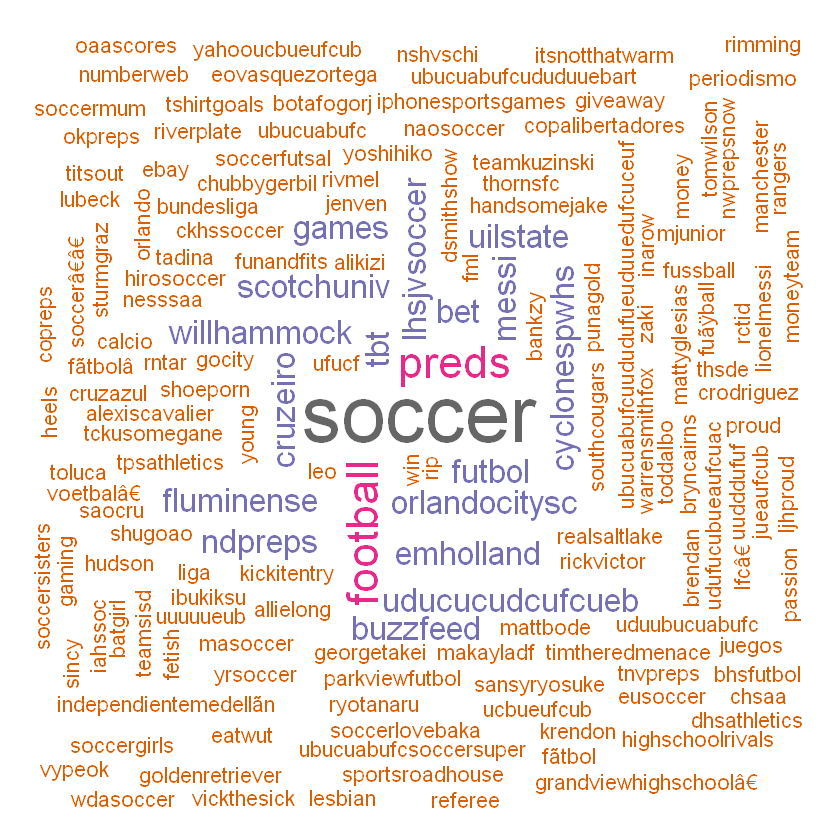

In [12]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))